<img src="https://github.com/sobester/ADRpy/raw/master/docs/ADRpy/ADRpy_splash.png" width="40%" align="left">

# The Capabilities, Function and use of Engine Decks in ADRpy

> _"Wait until we have worked on it for a while; we will soon design the simplicity out of it!"_ Lord Hives (of Rolls Royce) remark to Whittle's explanation of the simplicity of the jet engine <cite data-cite="Not Much of an Engineer">(Hooker, 1984)

An engine deck is a computerised model of an engine. The engine deck class takes real data from various engines where it has been digitised and converted into standardised forms. Manufactures of modern engines tend not to share information about their engines and so the data used tends to be from older aero engines. Despite this a good range of data for engines of different sizes is available. Note that in the conversion process some additional data specific to a particular source is lost.

The data used takes the form of performance curves. These have then been digitised and then interpolation is used to estimate data between the curves. They show some of the key aspects of an engines performance for aeronautical applications.

There are ways to model the performance of a jet engine, however the real world is much more complex and nuanced than the simple models that try and capture it. Various discrepancies resulting from the complexities and operational details of the engines can result in significant deviations from theory. This data, it allows us to get more of a handle on the performance of these engines. We can use this data to see how the actual engine's performance will affect the design choices made in aeronautical engineers.

While this data is a step up from simple theories and assumptions, it still doesn't capture all the nuances of the engine's performance for all the operating conditions. For example, engine age, fuel type and inlet temperature are not directly accounted for. These engine decks are only as sophisticated as the data used to create them.

### The decks in the class 
<p>There are four engine types with provided data:</p>
<ul>
 <li><i> Turboprop: </i> Power output, hot thrust and BSFC for the engine as the outputs</li>
 <li><i> Jet: </i> This class included turbojet and turbofan data. Thrust and TSFC data are the outputs. Note that sea level polynomials are available for this class</li>
 <li><i> Piston: </i> Mostly unaffected by velocity, power output and BSFC for the engine are the outputs.</li>
 <li><i> Electric: </i> This produces data based on efficiency maps</li>
</ul>
For all these engines, demo plots can be created to easily show the data and its limits. These are good in giving an indication as to the typical values to be expected from a given engine.

### Contents <a class="anchor" id="contents">

* [Turboprop Deck](#turboprop)
* [Jet Deck](#jet)
* [Piston Deck](#piston)
* [Electric Deck](#electric)
* [Propeller Deck](#propeller)

In [1]:
from ADRpy import propulsion as decks

## Turboprop Deck <a class="anchor" id="turboprop">
[Table Of Contents](#contents)

Firstly we shall use local data to investigate the types available. 

In [2]:
decks.local_data("turboprop")

{'T56-A': {'available_data': ['T56-A_BSFC_data.csv',
   'T56-A_Power_data.csv',
   'T56-A_Thrust_data.csv'],
  'engine_notes': 'Exact version not stated',
  'reference': 'Saarlas, M., "Aircraft Performance", Wiley (2006), Figure D11 - D13, https://doi.org/10.1002/9780470117859.app4'},
 'Tyne_RTy11': {'available_data': ['Tyne_RTy11_Airflow_data.csv',
   'Tyne_RTy11_BSFC_data.csv',
   'Tyne_RTy11_Power_data.csv',
   'Tyne_RTy11_Thrust_data.csv'],
  'engine_notes': 'Technically RTy.11, but the full stop has been omitted to avoid any issues that may arise from the file name.',
  'reference': 'Hill, PG., Peterson CR., "Mechanics and Thermodynamics Of Propulsion", Addison-Wesley 1965, Figure 6-27, https://archive.org/details/MechanicsAndThermodynamicsOfPropulsionHillPeterson/'}}

The turboprop decks main functions are thrust, power and BSFC. As an example engine we shall select the Rolls Royce Tyne RTy.11.

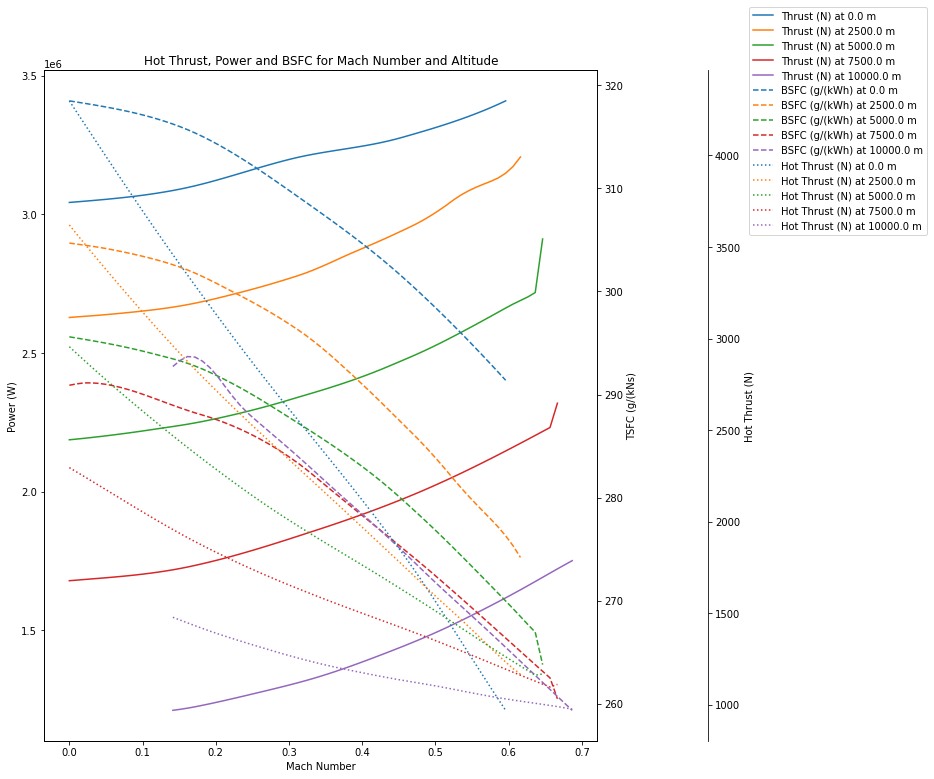

In [3]:
import numpy as np
import matplotlib.pyplot as plt

turbo = decks.TurbopropDeck("Tyne_RTy11")  # Selects data for Rolls Royce Tyne.
mach = np.linspace(0, 1, 100)  # Creates array for mach data.
altitude = np.linspace(0, 10000, 5)  # Creates an array for altitude data.
fig, ax1 = plt.subplots(figsize=(10, 10))  # Creates figure to plot.
fig.subplots_adjust(right=0.75)
ax2 = ax1.twinx()  # shares x axis with ax1
ax3 = ax1.twinx()  # shares x axis with ax1
ax3.spines["right"].set_position(("axes", 1.2))  # Moves the legend
# Plots a line for each altitude
for alt in altitude:
    # Calculates Thrust
    # Plots power (W)
    ax1.plot(mach, turbo.shaftpower(mach, alt), label="Thrust (N) at " + str(alt) + " m")
    # Plots TSFC g/(kNs)
    ax2.plot(mach, turbo.bsfc(mach, alt), "--", label="BSFC (g/(kWh) at " + str(alt) + " m")
    # Plots Thrust (N)
    ax3.plot(mach, turbo.hotthrust(mach, alt), ":", label="Hot Thrust (N) at " + str(alt) + " m")
fig.legend(loc="center", bbox_to_anchor=(1.15, 0.9))  # Plots the legend
fig.tight_layout()  # Fits subplot in figure area.
ax1.set_title("Hot Thrust, Power and BSFC for Mach Number and Altitude")  # Sets Title
ax1.set_xlabel("Mach Number")  # Sets x label
ax1.set_ylabel("Power (W)")  # Sets left hand y label
ax2.set_ylabel("TSFC (g/(kNs)")  # Sets right hand y label
ax3.set_ylabel("Hot Thrust (N)")  # Sets right hand y label
None

### Demo Plots
These plots show the range of data the can be interpolated as well as a good way to show how the engine performs over a range of altitudes.

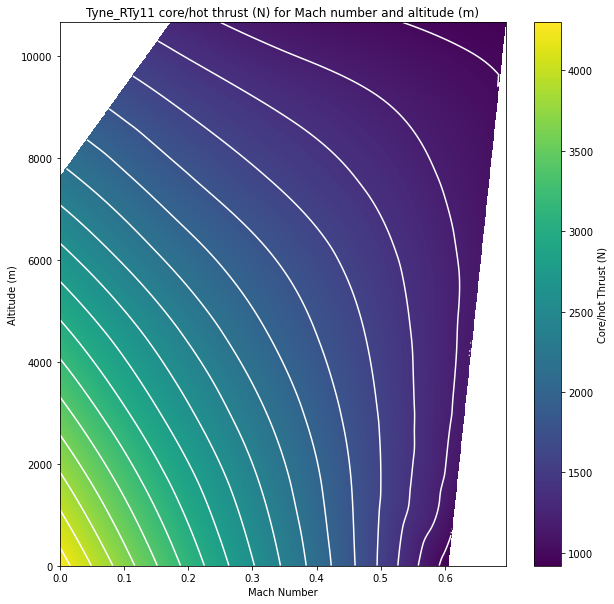

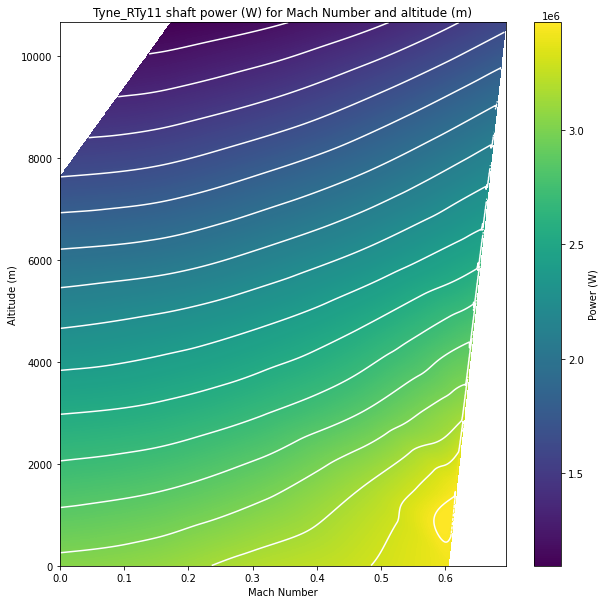

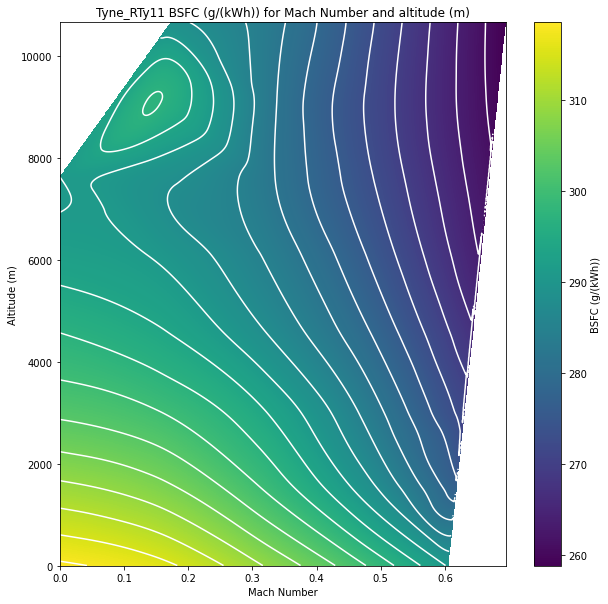

In [4]:
turbo.demoplot_thrust()
turbo.demoplot_shaftpower()
turbo.demoplot_bsfc()

Note that the interpolator used may be extrapolating near the edges of the data as it forms a convex hull around the data. This can produce some anomalous results.

## Jet Deck <a class="anchor" id="jet">
[Table Of Contents](#contents)

Firstly we shall use local data to investigate the types available. 

In [5]:
 decks.local_data("jet")

{'ATF3-6A': {'available_data': ['ATF3-6A_Sea_level_thrust_polynomial.csv',
   'ATF3-6A_Thrust_data.csv',
   'ATF3-6A_TSFC_data.csv'],
  'engine_notes': ' Take-off/cruise Thrust',
  'reference': ' Oates, GC., "Aerothermodynamics of Gas Turbine and Rocket Propulsion", 3rd Edition, AIAA, Fig 5.11 , 5.12, pp.129, https://app.knovel.com/hotlink/toc/id:kpAGTRPE01/aerothermodynamics-gas/aerothermodynamics-gas'},
 'F404-400': {'available_data': ['F404-400_Sea_level_thrust_polynomial.csv',
   'F404-400_Thrust_data.csv'],
  'engine_notes': ' installed performance of engine',
  'reference': ' Saarlas, M.,  "Aircraft Performance", Wiley (2006), Figure D7, https://doi.org/10.1002/9780470117859.app4'},
 'FJ-44': {'available_data': ['FJ-44_Sea_level_thrust_polynomial.csv',
   'FJ-44_Thrust_data.csv',
   'FJ-44_TSFC_data.csv'],
  'engine_notes': '',
  'reference': ' Saarlas, M., "Aircraft Performance", Wiley (2006), Figure D5, https://doi.org/10.1002/9780470117859.app4'},
 'JT8D-9': {'available_data':

The jet decks main functions are thrust and TSFC. As an example engine we shall select the Pratt and Whitney JT8D-9.

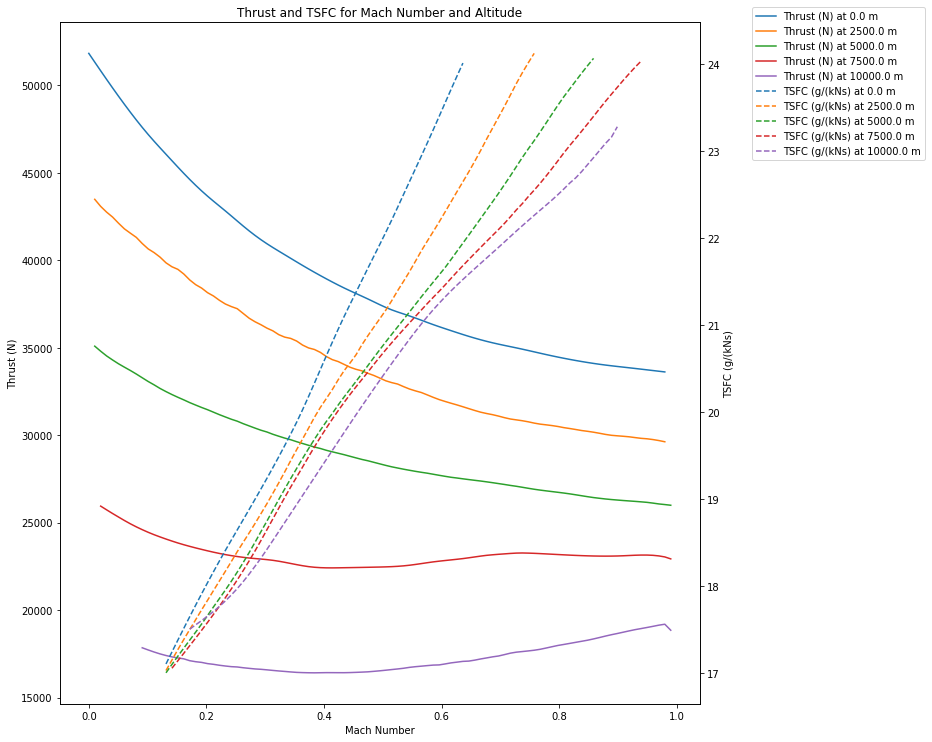

In [6]:
import numpy as np
import matplotlib.pyplot as plt


jet = decks.JetDeck("JT8D-9")  # Selects data for JT8D-9.
mach = np.linspace(0, 1, 100)  # Creates array for mach data.
altitude = np.linspace(0, 10000, 5)  # Creates an array for altitude data.
fig, ax1 = plt.subplots(figsize=(10, 10))  # Creates figure to plot.
ax2 = ax1.twinx()  # shares x axis with ax1
# Plots a line for each altitude
for alt in altitude:
    # Calculates Thrust
    thrust = jet.thrust(mach, alt)
    # Plots Thrust (N)
    ax1.plot(mach, thrust, label="Thrust (N) at " + str(alt) + " m")
    # Plots TSFC g/(kNs)
    ax2.plot(mach, jet.tsfc(mach, thrust), "--", label="TSFC (g/(kNs) at " + str(alt) + " m")
fig.legend(loc="center", bbox_to_anchor=(1.15, 0.9))  # Plots the legend
fig.tight_layout()  # Fits subplot in figure area.
ax1.set_title("Thrust and TSFC for Mach Number and Altitude")  # Sets Title
ax1.set_xlabel("Mach Number")  # Sets x label
ax1.set_ylabel("Thrust (N)")  # Sets left hand y label
ax2.set_ylabel("TSFC (g/(kNs)")  # Sets right hand y label
None

### Jet Polynomials
For the JT8D-9 we have both sea level thrust and sea level take off thrust polynomials available. These are very fast methods of obtaining data are are within at least 1% of the data points used.

In [7]:
print(jet.sl_thrust(0.4), "N Thrust\n", jet.sl_take_off_thrust(0.4), "N Thrust")

39008.251058433016 N Thrust
 53179.248666918036 N Thrust


### Demo Plots
These plots show the range of data that can be interpolated as well as a good way to show how the engine performs over a range of altitudes.

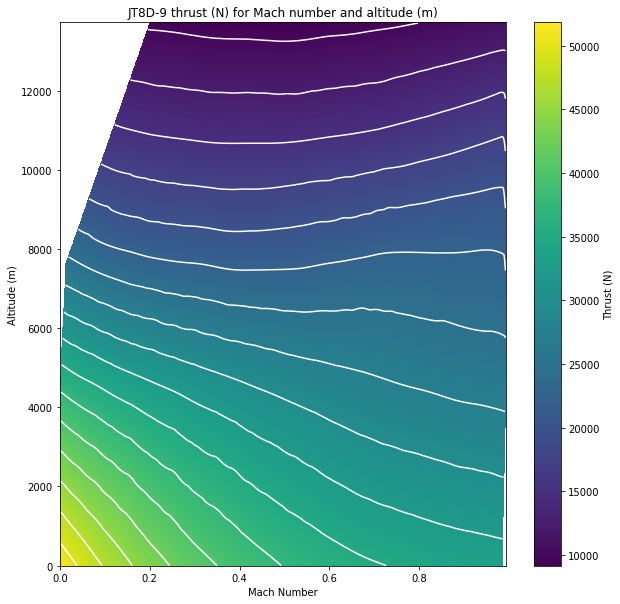

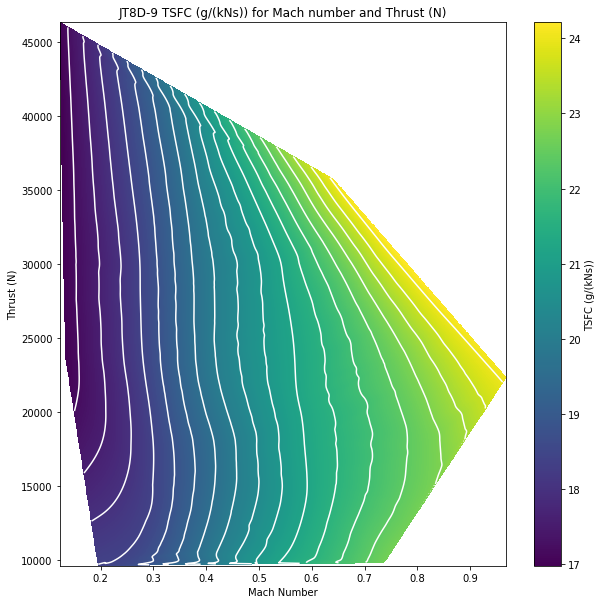

In [8]:
jet.demoplot_thrust()
jet.demoplot_tsfc()

Note that the interpolator may be extrapolating near the edges of the data as it forms a convex hull around the data. This can produce some anomalous results.

### Mattingly Comparison

The following comparisons compare the Mattingly model in the atmospheres module of ADRpy. The parameters have been 

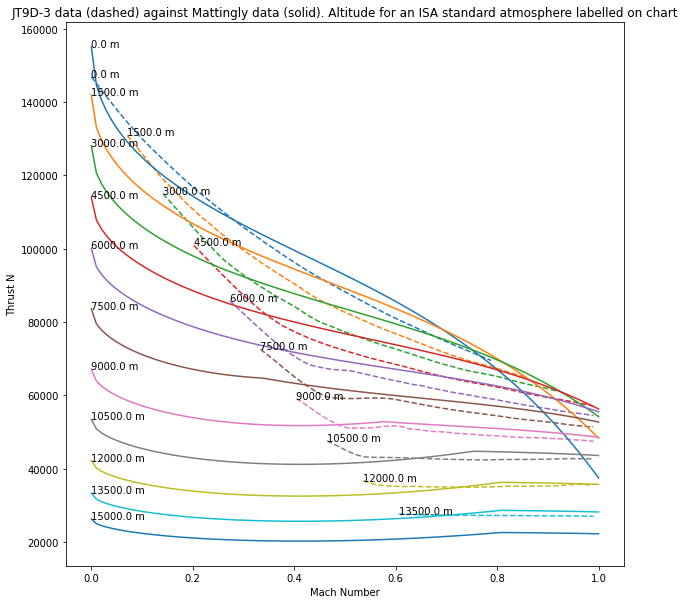

In [9]:
import ADRpy.atmospheres as atm
isa_atm = atm.Atmosphere()

engine = "JT9D-3"
turbofan = decks.JetDeck(engine)
zerothrust = 155000 # Sets zero altitude and mach thrust
isa_alt = np.linspace(0, 15000, 11)  # ISA Altitude data (m)
mach_no = np.linspace(0, 1, 100)  # Mach number data
isa_temp = isa_atm.airtemp_c(isa_alt) # Temperatures for ISA standard atmosphere.
isa_press = isa_atm.airpress_pa(isa_alt)  # Pressure for ISA standard atmosphere.
plt.figure(figsize=(10, 10))  # Creates figure and sets size
# Creates thrust curve for each altitude
for index, altitude in enumerate(isa_alt):
    # Plots interpolated data 
    thrust = turbofan.thrust(mach_no, altitude)
    plt.plot(mach_no, thrust, color="C" + str(index)[-1], ls="--", 
             label = str(round(altitude, 2)) + " Altitude (m) for " + engine)
    for index, value in enumerate(thrust):
        type(np.isnan(value))
        if np.isnan(value) == False:
            plt.text(mach_no[index], thrust[index], str(round(altitude, 2)) + " m")
            break
throttleratio = 0.85
# Creates curve using Mattingly method in ADRpy.
for index, altitude in enumerate(isa_alt):
    # scales zerothrust so that for any throttle ratio, the data fits
    zerothrust2 = zerothrust/atm.turbofanthrustfactor(isa_temp[0], isa_press[0], 0,throttleratio, ptype = "highbpr")
    data_list = []
    for mach in mach_no:
        data_list.append(zerothrust2 * atm.turbofanthrustfactor(isa_temp[index], isa_press[index], mach,
                                                               throttleratio, ptype = "highbpr"))
    plt.plot(mach_no, data_list, color="C" + str(index)[-1], ls="-", label = str(round(altitude, 2)) + 
             " Altitude (m) for " + engine)
    plt.text(mach_no[0], data_list[0], str(round(altitude, 2)) + " m")
plt.title(engine + " data (dashed) against Mattingly data (solid). Altitude for an ISA standard atmosphere labelled on chart")
plt.xlabel("Mach Number")  # Plots x label
plt.ylabel("Thrust N")  # Plots y label
plt.show()  # Shows plot

## Piston Decks <a class="anchor" id="piston">
[Table Of Contents](#contents)

Firstly we shall use local data to investigate the types available. 

In [10]:
decks.local_data("piston")

{'IO-540': {'available_data': ['IO-540_BSFC_best_power_data.csv',
   'IO-540_BSFC_data.csv',
   'IO-540_Power_data.csv'],
  'engine_notes': 'Exact version not stated',
  'reference': 'Saarlas, M., "Aircraft Performance", Wiley (2006), Figure 2 - D3, https://doi.org/10.1002/9780470117859.app4'},
 'Wasp_Major_B13': {'available_data': ['Wasp_Major_B13_BSFC_data.csv',
   'Wasp_Major_B13_Power_data.csv'],
  'engine_notes': '',
  'reference': 'Hill, PG., Peterson CR., "Mechanics and Thermodynamics Of Propulsion", Addison-Wesley 1965, Figure 6-28, https://archive.org/details/MechanicsAndThermodynamicsOfPropulsionHillPeterson/'}}

The piston deck's main functions are power and BSFC (which is can be either best power or best economy). As an example engine we shall select the Lycoming IO-540.

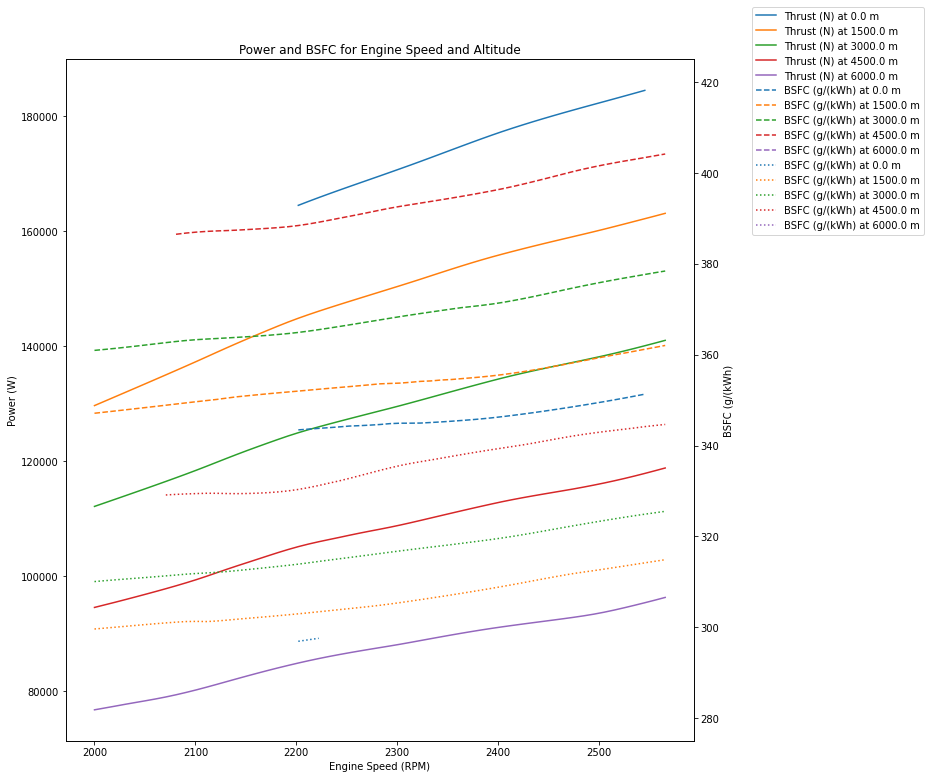

In [11]:
import numpy as np
import matplotlib.pyplot as plt


piston = decks.PistonDeck("IO-540")  # Selects data for the IO-540
engine_speed = np.linspace(2000, 3000, 100)  # Creates array for mach data.
altitude = np.linspace(0, 6000, 5)  # Creates an array for altitude data.
fig, ax1 = plt.subplots(figsize=(10, 10))  # Creates figure to plot.
ax2 = ax1.twinx()  # shares x axis with ax1
ax3 = ax1.twinx()  # shares x axis with ax1
# Plots a line for each altitude
for alt in altitude:
    power = piston.shaftpower(engine_speed, alt)
    # Plots Thrust (N)
    ax1.plot(engine_speed, power, label="Thrust (N) at " + str(alt) + " m")
    # Plots TSFC g/(kNs)
    ax2.plot(engine_speed, piston.bsfc(engine_speed, power), "--", label="BSFC (g/(kWh) at " + str(alt) + " m")
    ax3.plot(engine_speed, piston.bsfc(engine_speed, power, best="economy"), ":", label="BSFC (g/(kWh) at " + str(alt) + " m")
fig.legend(loc="center", bbox_to_anchor=(1.15, 0.9))  # Plots the legend
fig.tight_layout()  # Fits subplot in figure area.
ax2.set_ylim(bottom=275, top=425)  # Sets limits for y axis
ax3.set_ylim(bottom=275, top=425)  # Sets limits for y axis
ax3.axis("off")  # Turns off axis
ax1.set_title("Power and BSFC for Engine Speed and Altitude")  # Sets Title
ax1.set_xlabel("Engine Speed (RPM)")  # Sets x label
ax1.set_ylabel("Power (W)")  # Sets left hand y label
ax2.set_ylabel("BSFC (g/(kWh)")  # Sets right hand y label
None

### Demo Plots
These plots show the range of data the can be interpolated as well as a good way to show how the engine performs over a range of altitudes.

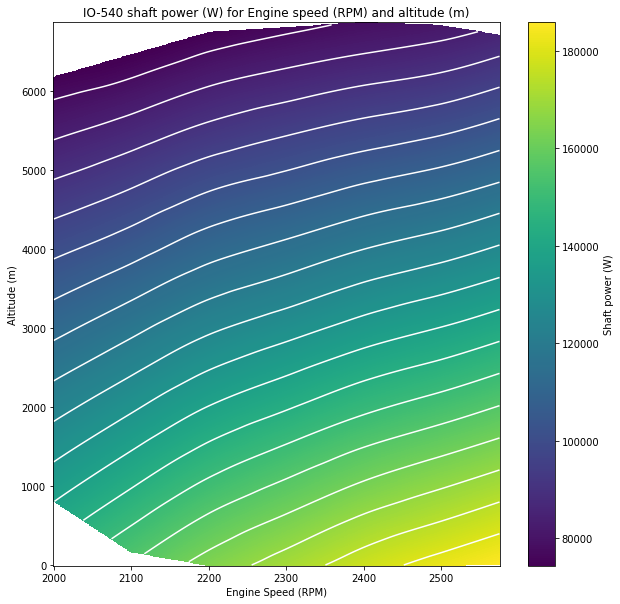

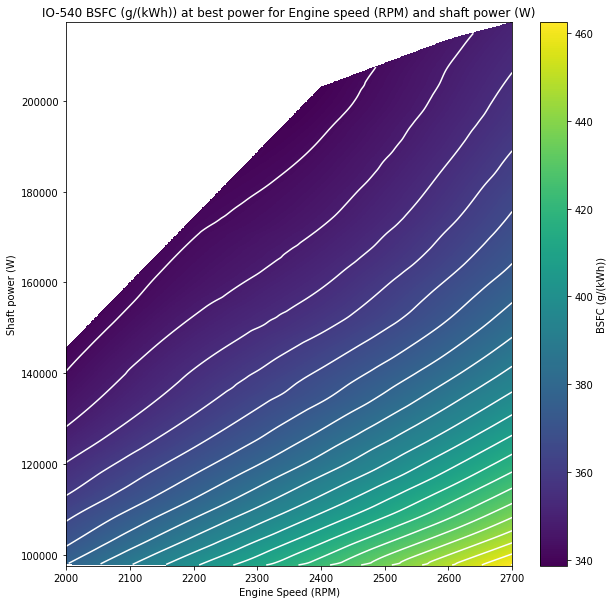

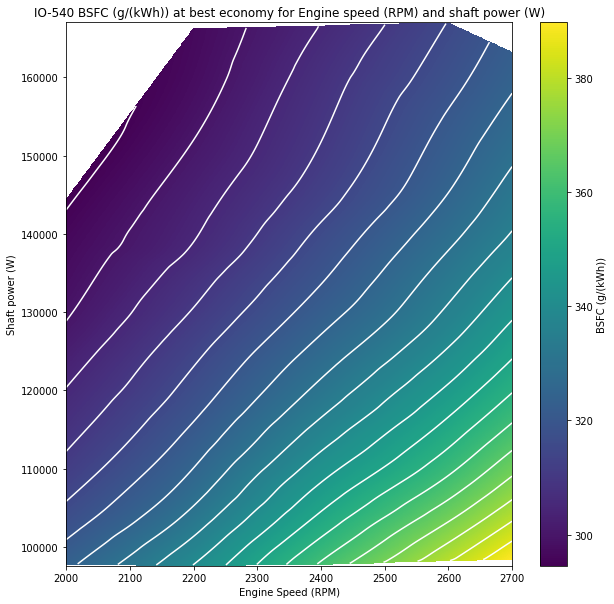

In [12]:
piston.demoplot_shaftpower()
piston.demoplot_bsfc(best="power")
piston.demoplot_bsfc(best="economy")  # Default

Note that the interpolator may be extrapolating near the edges of the data as it forms a convex hull around the data. This can produce some anomalous results.

## Electric Deck <a class="anchor" id="electric">
[Table Of Contents](#contents)

Firstly we shall use local data to investigate the types available. 

In [13]:
decks.local_data("electric")

{'JMX57': {'available_data': ['JMX57_Efficiency_data.csv'],
  'engine_notes': 'Efficiency Map, likely including controller performance',
  'reference': 'Chin, JC., Tallerico, TT., Smith AD., "X-57 Mod 2 Motor Thermal Analysis", Figure 8, https://ntrs.nasa.gov/citations/20190032520'},
 'YASA_750R': {'available_data': ['YASA_750R_Efficiency_data.csv'],
  'engine_notes': 'Efficiency Map, including controller',
  'reference': 'YASA limited, "YASA 750 Datasheet", Combined Motor AND controller Efficiency, https://www.yasa.com/wp-content/uploads/2018/01/YASA-750-Product-Sheet.pdf'}}

The electric decks main function is efficiency. As an example engine we shall select the Joby JMX57.

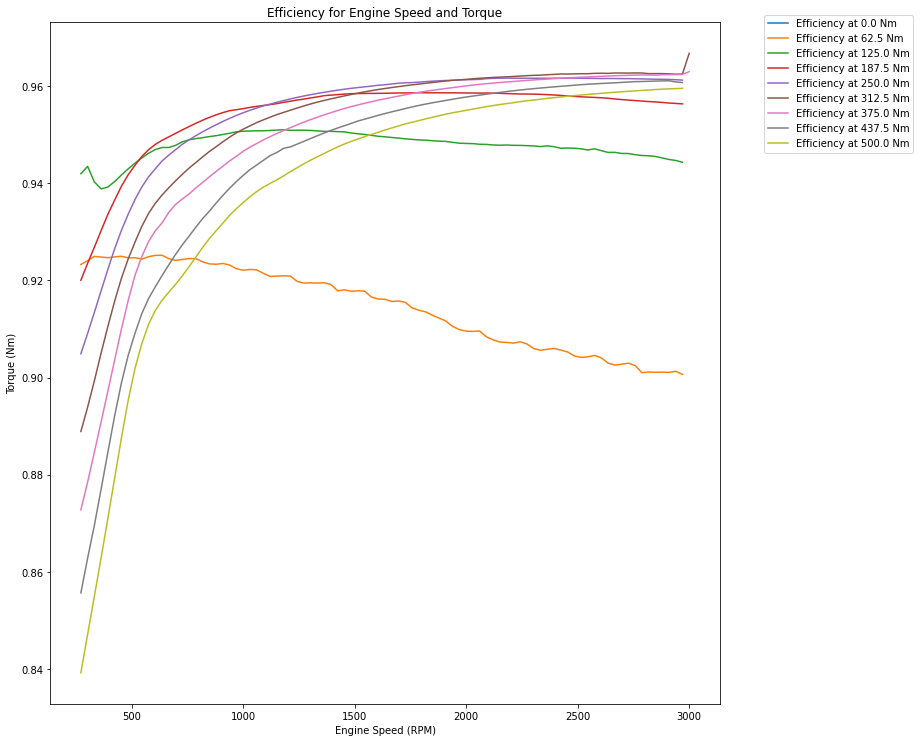

In [14]:
import numpy as np
import matplotlib.pyplot as plt


electric = decks.ElectricDeck("JMX57")  # Selects data for JMX57
engine_speed = np.linspace(0, 3000, 100)  # Creates array for engine speed
torque = np.linspace(0, 500, 9)  # Creates an array for torque 
fig, ax1 = plt.subplots(figsize=(10, 10))  # Creates figure to plot.
# Plots a line for each altitude
for torq in torque:
    # Plots efficiency
    ax1.plot(engine_speed, electric.efficiency(engine_speed, torq), label="Efficiency at " + str(torq) + " Nm")
fig.legend(loc="center", bbox_to_anchor=(1.15, 0.9))  # Plots the legend
fig.tight_layout()  # Fits subplot in figure area.
ax1.set_title("Efficiency for Engine Speed and Torque")  # Sets Title
ax1.set_xlabel("Engine Speed (RPM)")  # Sets x label
ax1.set_ylabel("Torque (Nm)")  # Sets y label
None

### Demo Plots
These plots show the range of data the can be interpolated as well as a good way to show how the engine performs over a range of altitudes.

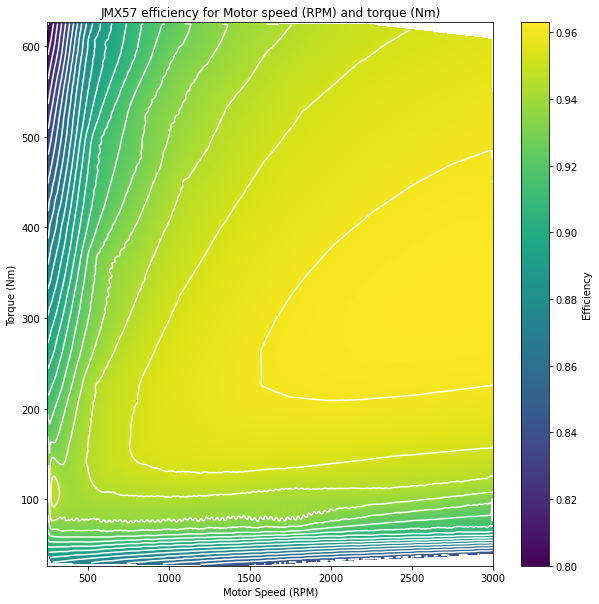

In [15]:
electric.demoplot_efficiency()

Note that the interpolator may be extrapolating near the edges of the data as it forms a convex hull around the data. This can produce some anomalous results.

## Propeller Deck <a class="anchor" id="propeller">
[Table Of Contents](#contents)

This deck contains a model that estimates the maximum propeller efficiency for a propeller, and requires various aspects of the propeller geometry to be specified. If propeller solidity is not given, an analytical solution assuming constant blade chord is used.

In [16]:
propeller_spec = {'diameter_m': 3, 'bladecount': 2, 'bladeactivityfact': 150,
                 'solidity': False, 'idesign_cl': 0.15}

#Instantiate an object of the PropellerDeck class
testpropeller = decks.PropellerDeck(propeller_spec)

In [17]:
etaprop = testpropeller.efficiency(mach=0.6, altitude_m=3000, shaftpower_w=522000, prop_rpm=2000)

print("Propeller efficiency:", etaprop)

Propeller efficiency: [0.88674586]


Alternatively, if a propeller geometry is not yet known or refined at this stage of the design process, the `ansatzprop` function can be called to generate a stand-in propeller geometry, for an ansatz solution to the propeller efficiency mach/altitude model.

In [18]:
#Instantiate an object of the PropellerDeck class
ansatzpropeller = decks.PropellerDeck()

ansatzpropeller.ansatzprop(mach=0.6, altitude_m=3000, prop_rpm=2000, shaftpower_w=522000)

In [19]:
etaprop = ansatzpropeller.efficiency(mach=0.6, altitude_m=3000, prop_rpm=2000, shaftpower_w=522000)

print("Propeller efficiency:", etaprop)

Propeller efficiency: [0.86949368]
